In [1]:
import pandas as pd
import numpy as np
import io
import os
import umap
from sklearn.preprocessing import StandardScaler

/Users/leon/miniconda3/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leon/miniconda3/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leon/miniconda3/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDeprecationWarni

In [2]:
df = pd.read_csv("/Users/leon/projects/polyprotein_stats/data/processed/scGPT_embeddings_all_33M.csv.gz")

In [3]:
df

,gene_symbol,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,RP5-973N23.5,-1.900666,1.008205,1.700949,-1.543543,-0.146449,0.437835,0.818120,1.525171,0.507942,...,-0.151505,0.353690,-0.367422,-0.536385,-1.292154,-0.117272,1.193797,-0.771150,-0.558256,0.415056
1,RP11-182N22.10,1.556087,1.778463,1.249432,-0.428208,1.095613,1.898772,2.024094,0.804736,1.596681,...,0.695430,-1.938557,-1.760550,-0.782715,1.335167,-0.058358,-1.304158,1.195878,1.208881,-0.827726
2,CTB-53D8.3,1.608870,0.325701,1.779221,-1.611722,1.605913,-0.280124,1.043213,-0.137162,-0.293912,...,-0.826549,0.404296,-0.171192,-1.029283,-2.383912,-0.522179,0.309257,1.909941,1.899168,-1.398976
3,RP11-348N17.2,1.130924,-1.773786,-0.930647,-1.764856,0.797817,-1.395671,2.002463,-1.777045,-0.214678,...,0.050378,1.101667,-0.332266,-1.309710,-1.782845,-1.190935,1.560056,0.627506,-1.391358,-0.485762
4,RP11-205M20.8,1.644218,-1.700228,0.876516,1.139952,0.231117,1.131183,2.166717,0.939040,0.941373,...,-1.266729,0.423028,-2.249126,0.167525,-0.810349,-1.020210,0.790933,-1.048198,0.575956,-0.291738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60692,RP11-390P2.2,-0.133223,0.330320,1.274505,0.962591,1.014099,-0.221738,-0.885117,1.340010,-1.011061,...,0.688445,-2.275601,-2.197324,-0.863536,2.053516,-1.114872,1.285644,-0.082579,0.684189,-1.246334
60693,SGSM3-AS1,-1.700175,-0.811589,1.036156,0.621725,-1.512837,-2.019653,-0.126069,0.818089,0.895707,...,-1.170033,-0.380476,1.729575,-0.585314,-0.072690,0.683504,0.723238,-0.408050,-0.598092,0.055483
60694,RP11-812I20.2,-0.117905,-1.439252,1.922403,-1.206026,0.483851,0.674699,-1.140412,0.595461,-1.003542,...,-0.748952,0.389333,-0.552023,-1.087626,0.197743,-0.170933,2.002448,-0.235400,1.421850,-1.512110
60695,AC022154.7,0.329495,0.524627,0.329258,-1.183687,-1.159329,0.391086,-1.407561,-2.315228,0.616408,...,-0.469453,-0.219050,-1.595168,-0.843624,0.224266,0.259826,0.768177,-0.972372,0.376331,-0.673480


In [82]:
proportions = pd.read_csv("/Users/leon/projects/polyprotein_stats/data/processed/gene_symbol_summarized_proportions.csv")
filtered_df = df[df['gene_symbol'].isin(proportions.gene_symbol)]
filtered_df.to_csv("/Users/leon/projects/polyprotein_stats/data/processed/scGPT_embeddings_all_33M_filtered.csv.gz", index=False)




In [81]:
filtered_df.shape

(19504, 513)

In [67]:
import umap
import matplotlib.pyplot as plt

# UMAP transformation
reducer = umap.UMAP()
embedding = reducer.fit_transform(filtered_df.drop("gene_symbol", axis=1))
#seems the scale isn't needed
#filtered_df_scaled = StandardScaler().fit_transform(filtered_df.head(19504).drop("gene_symbol", axis=1))
#embedding = reducer.fit_transform(filtered_df_scaled)



In [68]:
embedding.shape

(19504, 2)

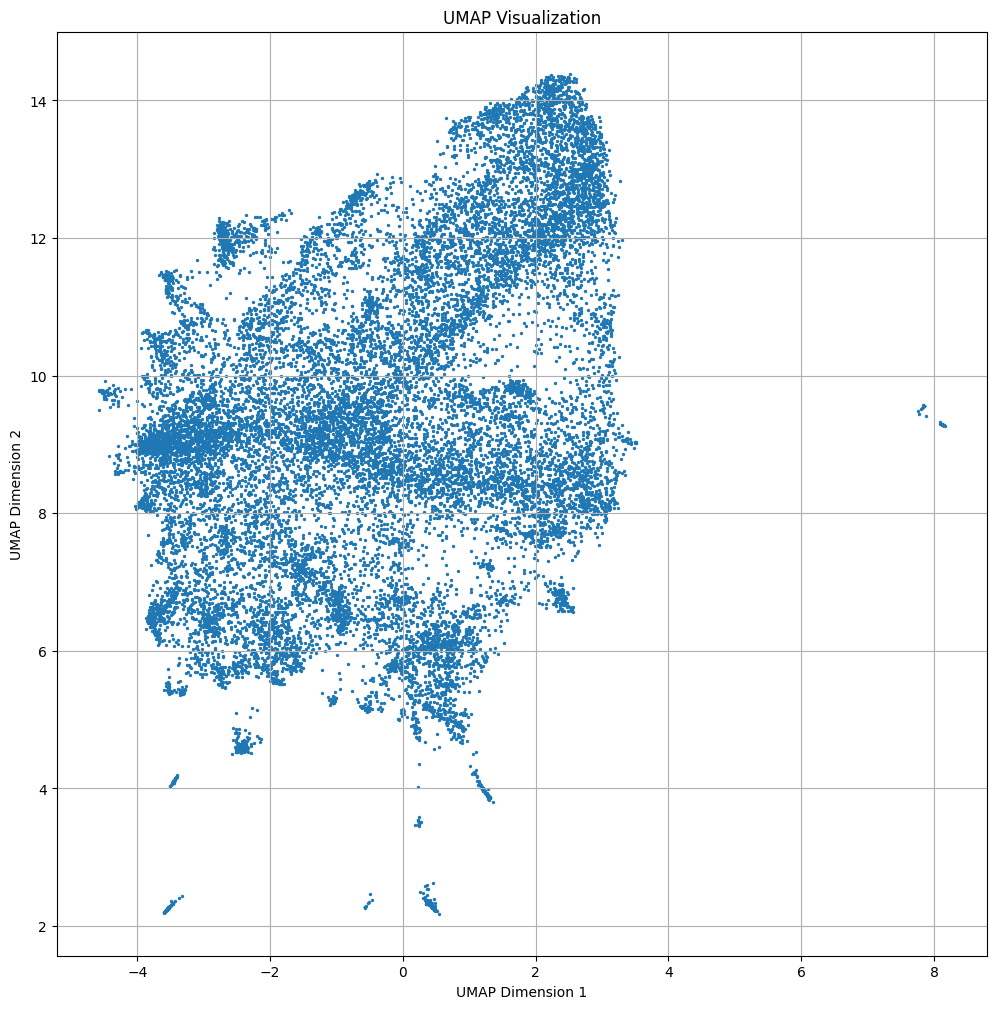

In [69]:
plt.figure(figsize=(12, 12))
plt.scatter(embedding[:, 0], embedding[:, 1], s=2)
plt.title("UMAP Visualization")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.show()


In [25]:
embedding.shape

(19504, 2)

In [6]:
#load in protein embeddings

In [80]:
embedding_df = pd.DataFrame(embedding)
embedding_df['gene_symbol'] = filtered_df['gene_symbol'].to_list()
embedding_df = embedding_df.rename(columns={1: 'UMAP 1', 0: 'UMAP 0'})
embedding_df.head()
cols = embedding_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
embedding_df = embedding_df[cols]
embedding_df.to_csv("/Users/leon/projects/polyprotein_stats/data/processed/gene_symbol_summarized_UMAP_scGPT_33M_filtered.csv")

In [8]:
proportions.shape

(20341, 22)

In [10]:
proportions.head()

,gene_symbol,M,K,V,T,A,E,I,S,W,...,L,G,D,Q,Y,H,P,R,C,length
0,A1BG,0.010598,0.027505,0.069531,0.064100,0.071552,0.078109,0.017288,0.075079,0.018927,...,0.120633,0.086935,0.038864,0.034824,0.018298,0.035834,0.090975,0.061202,0.021576,400.000
1,A1CF,0.027583,0.065919,0.065969,0.059079,0.099312,0.066966,0.051410,0.040462,0.006537,...,0.078614,0.094005,0.042798,0.036495,0.048509,0.012446,0.061762,0.055396,0.011139,542.875
2,A2M,0.024255,0.068036,0.102056,0.076468,0.050801,0.055588,0.031255,0.088731,0.001866,...,0.146992,0.066296,0.033100,0.030937,0.031280,0.027919,0.044583,0.029584,0.016197,451.250
3,A2ML1,0.024095,0.053125,0.071410,0.063234,0.057455,0.044727,0.043194,0.104884,0.011146,...,0.109897,0.064593,0.038897,0.059611,0.036657,0.016105,0.057817,0.035954,0.024563,644.500
4,A3GALT2,0.029412,0.026471,0.047059,0.035294,0.111765,0.055882,0.026471,0.041176,0.044118,...,0.120588,0.085294,0.038235,0.032353,0.023529,0.041176,0.064706,0.091176,0.014706,340.000


In [11]:
proportions.gene_symbol

0           A1BG
1           A1CF
2            A2M
3          A2ML1
4        A3GALT2
          ...   
20336       ZXDC
20337     ZYG11A
20338     ZYG11B
20339        ZYX
20340      ZZEF1
Name: gene_symbol, Length: 20341, dtype: object

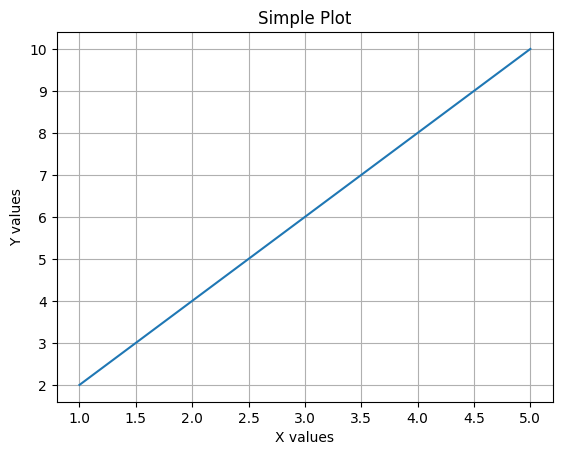

In [20]:
import matplotlib.pyplot as plt

# Prepare the data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Create the plot
plt.plot(x, y)

# Customize the plot
plt.title("Simple Plot")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.grid(True)

# Display the plot
plt.show()
